# s

Um dos principais blocos do PyTorch utilizado na construção de redes neurais é a camada linear, essa camada é utilizada para a construção de um modelo de redes neurais chamado *fully connected*, que são camadas de neuronios onde todos se conectam com todos.

A operação matemática realizada pela camada linear pode ser descrita através da seguinte expressão matemática.

In [9]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [71]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[20:40]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[20:40]
diabetes_y_test = diabetes.target[-20:]

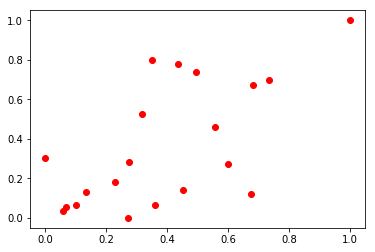

In [72]:
diabetes_X_train -= diabetes_X_train.min()
diabetes_X_train /= diabetes_X_train.max()
diabetes_y_train -= diabetes_y_train.min()
diabetes_y_train /= diabetes_y_train.max()
plt.plot(diabetes_X_train, diabetes_y_train, 'ro', label='Train data')
plt.show()

In [73]:
class LinearRegressionModel(torch.nn.Module): 
  
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)  # One in and one out 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 
  
# our model 
model = LinearRegressionModel()

In [74]:
x_data = torch.FloatTensor(diabetes_X_train)
y_data = torch.FloatTensor(diabetes_y_train)
y_data = y_data.view(diabetes_X_train.shape)

In [80]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) 

loss_vec = []
  
for epoch in range(5000): 
    inputs = Variable(x_data)
    target = Variable(y_data)
    
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    pred_y = model(inputs) 
  
    # Compute and print loss 
    loss = criterion(pred_y, target) 
  
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    loss_vec.append(loss.data[0])
    print('epoch {}, loss {}'.format(epoch, loss.data[0])) 

/l/disk0/atorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/l/disk0/atorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch 0, loss 0.06885529309511185
epoch 1, loss 0.06882506608963013
epoch 2, loss 0.06879490613937378
epoch 3, loss 0.0687648132443428
epoch 4, loss 0.0687347948551178
epoch 5, loss 0.06870483607053757
epoch 6, loss 0.0686749517917633
epoch 7, loss 0.06864513456821442
epoch 8, loss 0.0686153843998909
epoch 9, loss 0.06858570873737335
epoch 10, loss 0.06855609267950058
epoch 11, loss 0.06852654367685318
epoch 12, loss 0.06849706172943115
epoch 13, loss 0.0684676542878151
epoch 14, loss 0.06843829900026321
epoch 15, loss 0.0684090256690979
epoch 16, loss 0.06837981194257736
epoch 17, loss 0.0683506652712822
epoch 18, loss 0.0683215856552124
epoch 19, loss 0.06829257309436798
epoch 20, loss 0.06826362013816833
epoch 21, loss 0.06823474168777466
epoch 22, loss 0.06820592284202576
epoch 23, loss 0.06817717105150223
epoch 24, loss 0.06814848631620407
epoch 25, loss 0.06811986863613129
epoch 26, loss 0.06809131056070328
epoch 27, loss 0.06806282699108124
epoch 28, loss 0.06803439557552338
epo

epoch 712, loss 0.05819065496325493
epoch 713, loss 0.058184679597616196
epoch 714, loss 0.05817871540784836
epoch 715, loss 0.05817276984453201
epoch 716, loss 0.058166831731796265
epoch 717, loss 0.05816090852022171
epoch 718, loss 0.05815500393509865
epoch 719, loss 0.05814910680055618
epoch 720, loss 0.05814322456717491
epoch 721, loss 0.058137353509664536
epoch 722, loss 0.05813150107860565
epoch 723, loss 0.058125659823417664
epoch 724, loss 0.05811982974410057
epoch 725, loss 0.05811401084065437
epoch 726, loss 0.05810821056365967
epoch 727, loss 0.05810242146253586
epoch 728, loss 0.05809664726257324
epoch 729, loss 0.05809088423848152
epoch 730, loss 0.058085132390260696
epoch 731, loss 0.058079395443201065
epoch 732, loss 0.05807367339730263
epoch 733, loss 0.058067966252565384
epoch 734, loss 0.05806225910782814
epoch 735, loss 0.058056581765413284
epoch 736, loss 0.05805090814828873
epoch 737, loss 0.05804524943232536
epoch 738, loss 0.058039601892232895
epoch 739, loss 0.0

epoch 1369, loss 0.05615139752626419
epoch 1370, loss 0.056150056421756744
epoch 1371, loss 0.0561487190425396
epoch 1372, loss 0.05614738166332245
epoch 1373, loss 0.0561460517346859
epoch 1374, loss 0.056144725531339645
epoch 1375, loss 0.05614340305328369
epoch 1376, loss 0.05614208057522774
epoch 1377, loss 0.05614076182246208
epoch 1378, loss 0.05613945052027702
epoch 1379, loss 0.056138139218091965
epoch 1380, loss 0.056136831641197205
epoch 1381, loss 0.056135524064302444
epoch 1382, loss 0.05613422021269798
epoch 1383, loss 0.05613292381167412
epoch 1384, loss 0.056131623685359955
epoch 1385, loss 0.05613033100962639
epoch 1386, loss 0.05612903833389282
epoch 1387, loss 0.056127749383449554
epoch 1388, loss 0.056126464158296585
epoch 1389, loss 0.056125178933143616
epoch 1390, loss 0.05612390115857124
epoch 1391, loss 0.05612262710928917
epoch 1392, loss 0.056121353060007095
epoch 1393, loss 0.05612007901072502
epoch 1394, loss 0.056118812412023544
epoch 1395, loss 0.0561175458

epoch 2173, loss 0.055656883865594864
epoch 2174, loss 0.05565666779875755
epoch 2175, loss 0.05565645173192024
epoch 2176, loss 0.05565623939037323
epoch 2177, loss 0.05565602332353592
epoch 2178, loss 0.05565581098198891
epoch 2179, loss 0.055655598640441895
epoch 2180, loss 0.05565539002418518
epoch 2181, loss 0.05565517395734787
epoch 2182, loss 0.055654965341091156
epoch 2183, loss 0.055654752999544144
epoch 2184, loss 0.05565454438328743
epoch 2185, loss 0.055654339492321014
epoch 2186, loss 0.055654127150774
epoch 2187, loss 0.05565391853451729
epoch 2188, loss 0.055653709918260574
epoch 2189, loss 0.05565350502729416
epoch 2190, loss 0.055653296411037445
epoch 2191, loss 0.05565308779478073
epoch 2192, loss 0.055652882903814316
epoch 2193, loss 0.0556526780128479
epoch 2194, loss 0.055652473121881485
epoch 2195, loss 0.05565226823091507
epoch 2196, loss 0.055652063339948654
epoch 2197, loss 0.05565185844898224
epoch 2198, loss 0.05565165728330612
epoch 2199, loss 0.055651456117

epoch 2949, loss 0.055578574538230896
epoch 2950, loss 0.05557853728532791
epoch 2951, loss 0.055578503757715225
epoch 2952, loss 0.05557847023010254
epoch 2953, loss 0.055578429251909256
epoch 2954, loss 0.05557839572429657
epoch 2955, loss 0.055578358471393585
epoch 2956, loss 0.0555783212184906
epoch 2957, loss 0.055578283965587616
epoch 2958, loss 0.05557825043797493
epoch 2959, loss 0.055578216910362244
epoch 2960, loss 0.05557817593216896
epoch 2961, loss 0.055578142404556274
epoch 2962, loss 0.05557810515165329
epoch 2963, loss 0.055578067898750305
epoch 2964, loss 0.05557803437113762
epoch 2965, loss 0.055577997118234634
epoch 2966, loss 0.05557796359062195
epoch 2967, loss 0.055577926337718964
epoch 2968, loss 0.05557789281010628
epoch 2969, loss 0.05557785928249359
epoch 2970, loss 0.05557782202959061
epoch 2971, loss 0.05557778850197792
epoch 2972, loss 0.055577751249074936
epoch 2973, loss 0.05557771772146225
epoch 2974, loss 0.055577684193849564
epoch 2975, loss 0.05557765

epoch 3690, loss 0.055565424263477325
epoch 3691, loss 0.05556541308760643
epoch 3692, loss 0.05556540936231613
epoch 3693, loss 0.05556540563702583
epoch 3694, loss 0.05556539446115494
epoch 3695, loss 0.05556539073586464
epoch 3696, loss 0.05556538328528404
epoch 3697, loss 0.055565375834703445
epoch 3698, loss 0.05556537210941315
epoch 3699, loss 0.05556536465883255
epoch 3700, loss 0.05556535720825195
epoch 3701, loss 0.05556534603238106
epoch 3702, loss 0.05556534230709076
epoch 3703, loss 0.05556533485651016
epoch 3704, loss 0.055565327405929565
epoch 3705, loss 0.05556532368063927
epoch 3706, loss 0.05556531623005867
epoch 3707, loss 0.05556530877947807
epoch 3708, loss 0.055565301328897476
epoch 3709, loss 0.05556529760360718
epoch 3710, loss 0.05556529015302658
epoch 3711, loss 0.055565282702445984
epoch 3712, loss 0.055565278977155685
epoch 3713, loss 0.05556526780128479
epoch 3714, loss 0.05556526035070419
epoch 3715, loss 0.055565256625413895
epoch 3716, loss 0.055565252900

epoch 4382, loss 0.055563054978847504
epoch 4383, loss 0.055563051253557205
epoch 4384, loss 0.055563051253557205
epoch 4385, loss 0.055563051253557205
epoch 4386, loss 0.05556304752826691
epoch 4387, loss 0.05556304380297661
epoch 4388, loss 0.05556304380297661
epoch 4389, loss 0.05556304752826691
epoch 4390, loss 0.05556304007768631
epoch 4391, loss 0.05556304007768631
epoch 4392, loss 0.05556304007768631
epoch 4393, loss 0.05556303635239601
epoch 4394, loss 0.05556303635239601
epoch 4395, loss 0.05556303635239601
epoch 4396, loss 0.05556303262710571
epoch 4397, loss 0.055563028901815414
epoch 4398, loss 0.055563028901815414
epoch 4399, loss 0.055563028901815414
epoch 4400, loss 0.055563028901815414
epoch 4401, loss 0.055563025176525116
epoch 4402, loss 0.055563025176525116
epoch 4403, loss 0.055563025176525116
epoch 4404, loss 0.055563025176525116
epoch 4405, loss 0.05556302145123482
epoch 4406, loss 0.05556302145123482
epoch 4407, loss 0.05556302145123482
epoch 4408, loss 0.0555630

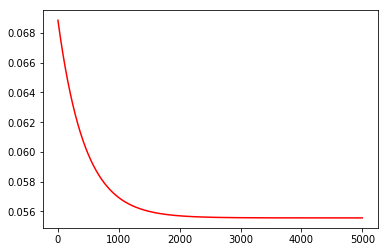

In [82]:
plt.plot(range(5000), loss_vec, 'r-', label='Train data')
plt.show()